In [1]:
from bs4 import BeautifulSoup
import requests
import html5lib
import time 
import random
import pandas as pd
from tqdm import tqdm
import numpy as np
from selenium import webdriver
from time import sleep
import random

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib.patches import FancyBboxPatch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle, Patch
from matplotlib.colors import LinearSegmentedColormap



import re
import numpy as np
import pandas as pd

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# --- 1. Đọc CSV ---
df = pd.read_csv(r"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/products_merged_no_scaler.csv")

# --- 2. Thư mục lưu ---
output_dir = r"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/outlier_no_scaler"
os.makedirs(output_dir, exist_ok=True)  # tạo thư mục nếu chưa có

# --- 3. Chọn các cột cần vẽ ---
cols = ["giá tiền (tỷ)", "diện tích đất (m2)", "giá/m2 (triệu/m2)",
        "số phòng ngủ", "số phòng vệ sinh", "tổng số tầng"]

# --- 4. Vẽ và lưu boxplot ---
for col in cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot của {col}")
    plt.ylabel("Giá trị")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # chuẩn hóa tên file: thay tất cả ký tự không phải chữ số/chuỗi thành '_'
    safe_col_name = re.sub(r'[^\w]+', '_', col)
    file_path = os.path.join(output_dir, f"{safe_col_name}.png")
    
    plt.savefig(file_path, bbox_inches='tight', dpi=150)
    plt.close()


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# --- 1. Đọc CSV ---
df = pd.read_csv(r"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/products_merged_scaler.csv")

# --- 2. Thư mục lưu ---
output_dir = r"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/outlier_scaler"
os.makedirs(output_dir, exist_ok=True)  # tạo thư mục nếu chưa có

# --- 3. Chọn các cột cần vẽ ---
cols = ["giá tiền (tỷ)", "diện tích đất (m2)", "giá/m2 (triệu/m2)",
        "số phòng ngủ", "số phòng vệ sinh", "tổng số tầng"]

# --- 4. Vẽ và lưu boxplot ---
for col in cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot của {col}")
    plt.ylabel("Giá trị")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # chuẩn hóa tên file: thay tất cả ký tự không phải chữ số/chuỗi thành '_'
    safe_col_name = re.sub(r'[^\w]+', '_', col)
    file_path = os.path.join(output_dir, f"{safe_col_name}.png")
    
    plt.savefig(file_path, bbox_inches='tight', dpi=150)
    plt.close()


In [2]:
df = pd.read_csv(r"C:\Users\LEGION\Jupyter\KhoaHocDuLieu\products_merged_no_scaler.csv")
df

,tên người đăng,giá tiền (tỷ),phố/đường,phường/thị trấn,quận/huyện,thành phố,loại hình căn hộ,diện tích đất (m2),giá/m2 (triệu/m2),giấy tờ pháp lý,số phòng ngủ,số phòng vệ sinh,tình trạng nội thất,hướng cửa chính,đặc điểm nhà/đất,tổng số tầng,ngày đăng,năm đăng,tháng đăng,ngày trong tuần
0,Nguyễn Duy Thắng,5.20,Phố Phan Đình Giót,Phường Phương Liệt,Quận Thanh Xuân,Hà Nội,"Tập Thể, Cư Xá",80.0,65.00,Sổ Hồng Riêng,2.0,4.0,Nội thất đầy đủ,Nam,Không Rõ,5.0,2025-10-02,2025,10,3
1,Mr Tran,16.50,Khuất Duy Tiến,Phường Nhân Chính,Quận Thanh Xuân,Hà Nội,Chung Cư,108.5,85.49,Sổ Hồng Riêng,4.0,3.0,Nội thất cao cấp,Đông Bắc,Không Rõ,5.0,2025-10-02,2025,10,3
2,Thái Nguyễn,1.80,Đường Nguyễn Trãi,Phường Thượng Đình,Quận Thanh Xuân,Hà Nội,Chung Cư,50.0,36.00,Hợp Đồng Mua Bán,2.0,1.0,Nội thất đầy đủ,Không Rõ,Không Rõ,5.0,2025-09-23,2025,9,1
3,Chính Chủ Bán,6.99,Phố Tôn Đức Thắng,Phường Hàng Bột,Quận Đống Đa,Hà Nội,Không Rõ,24.0,291.25,Đã Có Sổ,4.0,4.0,Không Rõ,Không Rõ,Hẻm xe hơi,5.0,2025-09-30,2025,9,1
4,Dương Thị Chinh,12.60,Phố Chính Kinh,Phường Nhân Chính,Quận Thanh Xuân,Hà Nội,Không Rõ,44.0,286.36,Đã Có Sổ,4.0,4.0,Không Rõ,Không Rõ,Không Rõ,4.0,2025-10-01,2025,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,Quang Cần,7.60,Phố Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Không Rõ,55.0,138.18,Đã Có Sổ,4.0,4.0,Nội thất đầy đủ,Không Rõ,Không Rõ,5.0,2025-09-20,2025,9,5
9822,Trần Mai,10.00,Đường Kim Giang,Xã Thanh Liệt,Huyện Thanh Trì,Hà Nội,Không Rõ,42.0,238.10,Đã Có Sổ,4.0,3.0,Không Rõ,Không Rõ,Nhà nở hậu\nHẻm xe hơi,4.0,2025-09-19,2025,9,4
9823,Nguyễn Hùng,8.30,Đường Thụy Khuê,Phường Bưởi,Quận Tây Hồ,Hà Nội,Không Rõ,30.0,276.67,Đã Có Sổ,3.0,4.0,Nội thất đầy đủ,Không Rõ,Không Rõ,5.0,2025-10-04,2025,10,5
9824,Dương Vinh,9.50,Đường Văn Cao,Phường Liễu Giai,Quận Ba Đình,Hà Nội,Không Rõ,35.0,271.43,Đã Có Sổ,3.0,4.0,Nội thất cao cấp,Không Rõ,Hẻm xe hơi\nNhà nở hậu,6.0,2025-09-23,2025,9,1


In [3]:
df = pd.read_csv(r"C:\Users\LEGION\Jupyter\KhoaHocDuLieu\products_merged_scaler.csv")
df

,tên người đăng,giá tiền (tỷ),phố/đường,phường/thị trấn,quận/huyện,thành phố,loại hình căn hộ,diện tích đất (m2),giá/m2 (triệu/m2),giấy tờ pháp lý,số phòng ngủ,số phòng vệ sinh,tình trạng nội thất,hướng cửa chính,đặc điểm nhà/đất,tổng số tầng,ngày đăng,năm đăng,tháng đăng,ngày trong tuần
0,Nguyễn Duy Thắng,-0.694792,Phố Phan Đình Giót,Phường Phương Liệt,Quận Thanh Xuân,Hà Nội,"Tập Thể, Cư Xá",1.113070,-1.168189,Sổ Hồng Riêng,-0.942039,0.187183,Nội Thất Đầy Đủ,Nam,Không Rõ,-0.008558,2025-10-02,2025,10,3
1,Mr Tran,1.495588,Khuất Duy Tiến,Phường Nhân Chính,Quận Thanh Xuân,Hà Nội,Chung Cư,2.318840,-0.967427,Sổ Hồng Riêng,0.124314,-0.626290,Nội Thất Cao Cấp,Đông Bắc,Không Rõ,-0.008558,2025-10-02,2025,10,3
2,Thái Nguyễn,-1.353845,Đường Nguyễn Trãi,Phường Thượng Đình,Quận Thanh Xuân,Hà Nội,Chung Cư,-0.156161,-1.452333,Hợp Đồng Mua Bán,-0.942039,-2.253238,Nội Thất Đầy Đủ,Không Rõ,Không Rõ,-0.008558,2025-09-23,2025,9,1
3,Chính Chủ Bán,-0.347820,Phố Tôn Đức Thắng,Phường Hàng Bột,Quận Đống Đa,Hà Nội,Không Rõ,-1.256162,1.048623,Đã Có Sổ,0.124314,0.187183,Không Rõ,Không Rõ,Hẻm Xe Hơi,-0.008558,2025-09-30,2025,9,1
4,Dương Thị Chinh,0.739616,Phố Chính Kinh,Phường Nhân Chính,Quận Thanh Xuân,Hà Nội,Không Rõ,-0.410007,1.000711,Đã Có Sổ,0.124314,0.187183,Không Rõ,Không Rõ,Không Rõ,-0.389076,2025-10-01,2025,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,Quang Cần,-0.229579,Phố Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Không Rõ,0.055377,-0.451166,Đã Có Sổ,0.124314,0.187183,Nội Thất Đầy Đủ,Không Rõ,Không Rõ,-0.008558,2025-09-20,2025,9,5
9822,Trần Mai,0.235635,Đường Kim Giang,Xã Thanh Liệt,Huyện Thanh Trì,Hà Nội,Không Rõ,-0.494623,0.527856,Đã Có Sổ,0.124314,-0.626290,Không Rõ,Không Rõ,Nhà Nở Hậu\nHẻm Xe Hơi,-0.389076,2025-09-19,2025,9,4
9823,Nguyễn Hùng,-0.093891,Đường Thụy Khuê,Phường Bưởi,Quận Tây Hồ,Hà Nội,Không Rõ,-1.002315,0.905768,Đã Có Sổ,-0.408863,0.187183,Nội Thất Đầy Đủ,Không Rõ,Không Rõ,-0.008558,2025-10-04,2025,10,5
9824,Dương Vinh,0.138716,Đường Văn Cao,Phường Liễu Giai,Quận Ba Đình,Hà Nội,Không Rõ,-0.790777,0.854426,Đã Có Sổ,-0.408863,0.187183,Nội Thất Cao Cấp,Không Rõ,Hẻm Xe Hơi\nNhà Nở Hậu,0.371959,2025-09-23,2025,9,1


In [4]:
print(sorted(df["số phòng ngủ"].unique()))
print(df["số phòng ngủ"].value_counts(dropna=False))


[-1.4752161144901577, -0.9420394660559688, -0.4088628176217802, 0.1243138308124084, 0.6574904792465972, 1.190667127680786, 1.7238437761149743, 2.257020424549164, 2.7901970729833523, 3.323373721417541, 3.8565503698517296]
số phòng ngủ
-0.408863    4393
 0.124314    2227
-0.942039    1191
 0.657490     651
 1.190667     497
 3.856550     297
-1.475216     232
 2.257020     117
 1.723844      92
 3.323374      67
 2.790197      62
Name: count, dtype: int64


# Dương
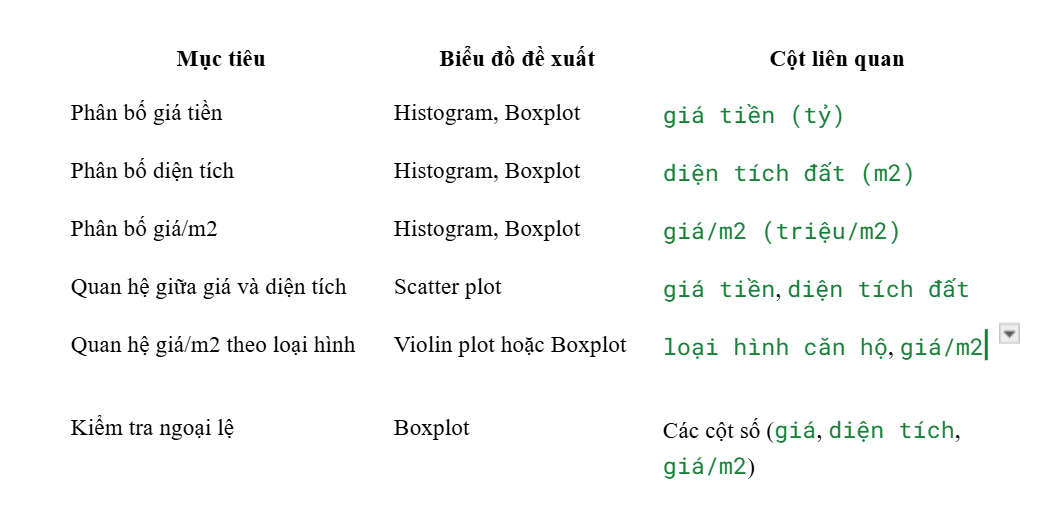

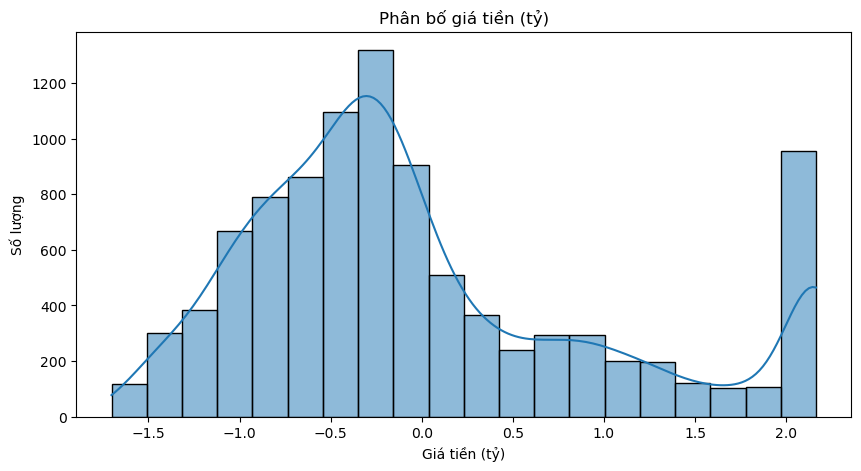

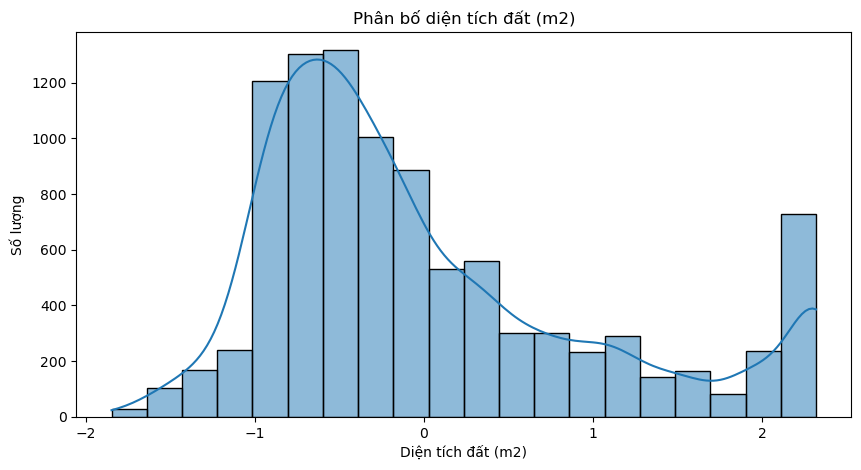

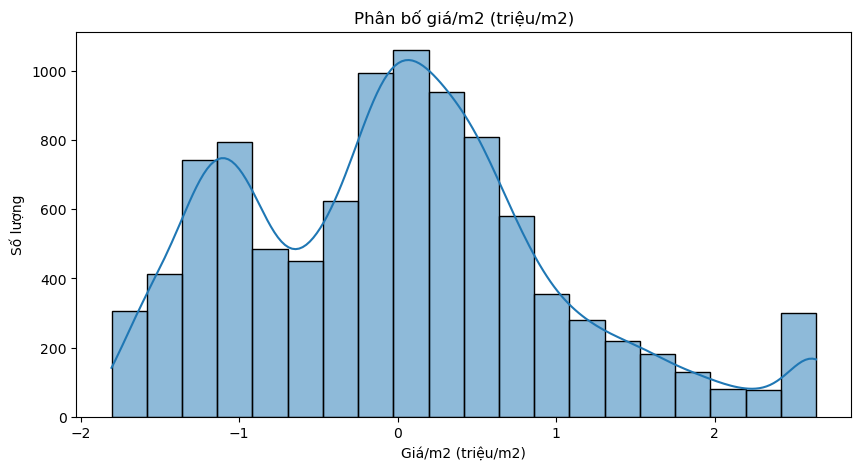

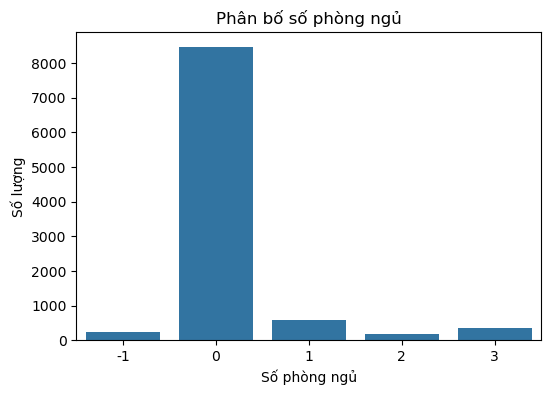

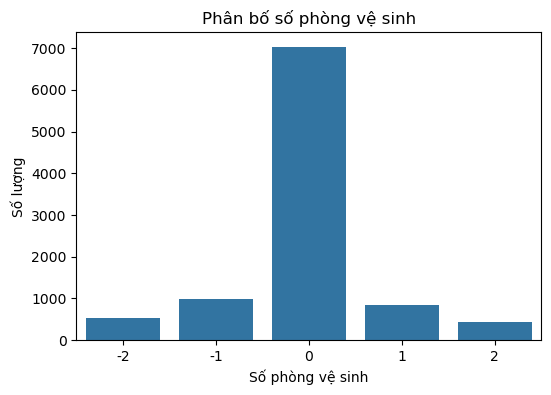

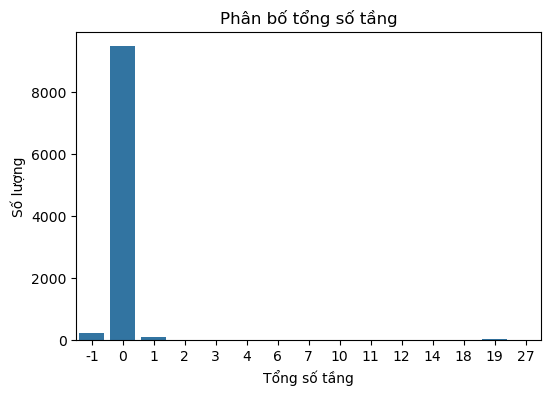

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Danh sách cấu hình biểu đồ
plot_configs = [
    {
        "col": "giá tiền (tỷ)",
        "title": "Phân bố giá tiền (tỷ)",
        "xlabel": "Giá tiền (tỷ)",
        "filename": "phan_bo_gia_tien"
    },
    {
        "col": "diện tích đất (m2)",
        "title": "Phân bố diện tích đất (m2)",
        "xlabel": "Diện tích đất (m2)",
        "filename": "phan_bo_dien_tich"
    },
    {
        "col": "giá/m2 (triệu/m2)",
        "title": "Phân bố giá/m2 (triệu/m2)",
        "xlabel": "Giá/m2 (triệu/m2)",
        "filename": "phan_bo_gia_m2"
    },
    {
        "col": "số phòng ngủ",
        "title": "Phân bố số phòng ngủ",
        "xlabel": "Số phòng ngủ",
        "filename": "phan_bo_phong_ngu"
    },
    {
        "col": "số phòng vệ sinh",
        "title": "Phân bố số phòng vệ sinh",
        "xlabel": "Số phòng vệ sinh",
        "filename": "phan_bo_phong_vesinh"
    },
    {
        "col": "tổng số tầng",
        "title": "Phân bố tổng số tầng",
        "xlabel": "Tổng số tầng",
        "filename": "phan_bo_tong_tang"
    },
]
for cfg in plot_configs[:3]:  # 3 cột đầu: histogram + boxplot
    col = cfg["col"]

    # Histogram
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(cfg["title"])
    plt.xlabel(cfg["xlabel"])
    plt.ylabel("Số lượng")
    plt.savefig(f"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/DoThi/PhanBo/{cfg['filename']}_hist.png",
            dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
# --------------------------
# 2️⃣ Vẽ Bar chart cho số phòng và tầng
# --------------------------
for cfg in plot_configs[3:]:
    col = cfg["col"]

    plt.figure(figsize=(6,4))
    df[col] = df[col].astype(int)
    sns.countplot(x=df[col])
    plt.title(cfg["title"])
    plt.xlabel(cfg["xlabel"]) 
    plt.xlabel(cfg["xlabel"])

    plt.ylabel("Số lượng")
    plt.savefig(f"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/DoThi/PhanBo/{cfg['filename']}_bar.png",
            dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Phúc
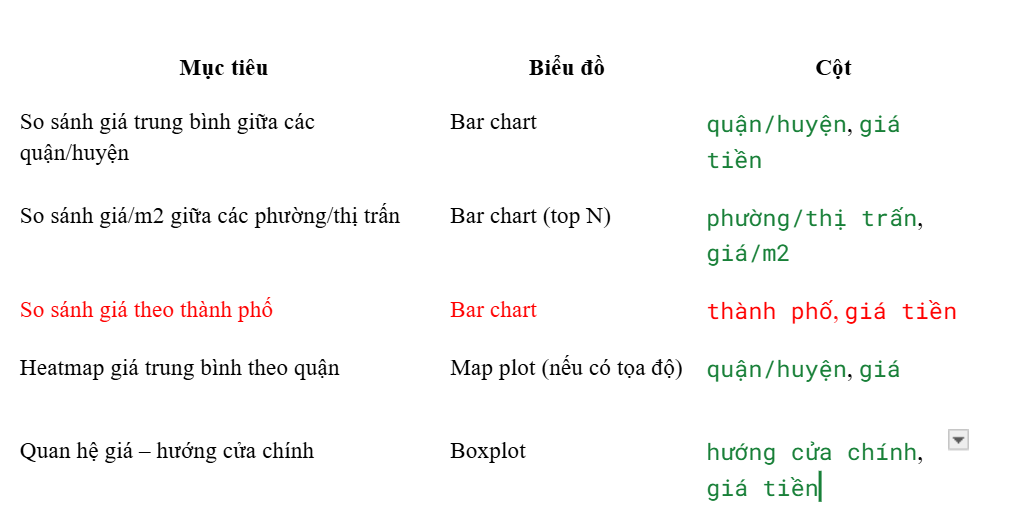


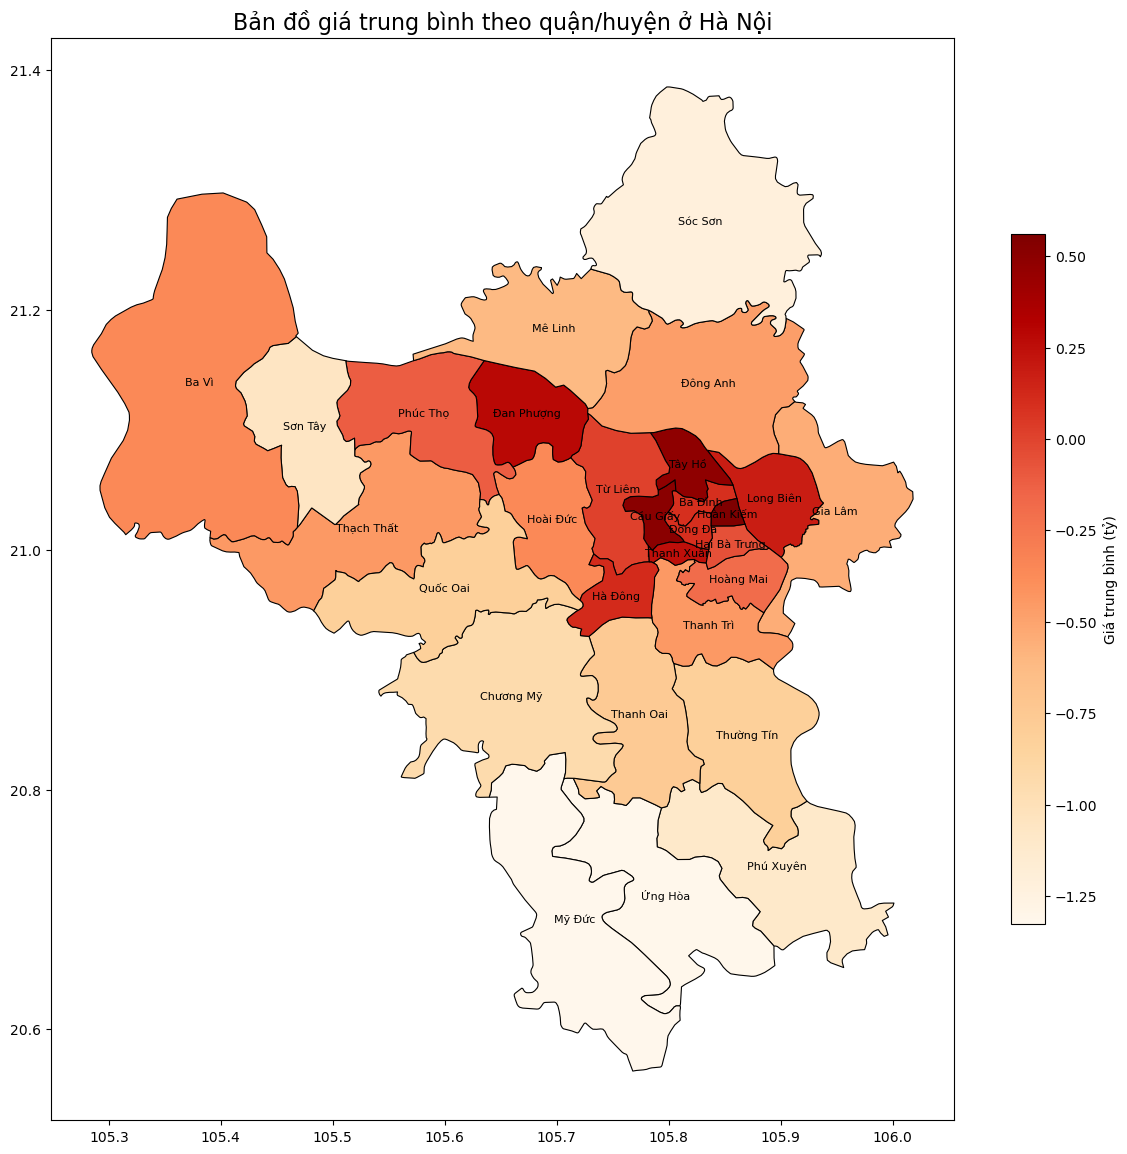

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode

# --- 1. Đọc GeoJSON ---
gdf = gpd.read_file(r"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/diaphanhuyen.geojson")

# --- 2. Lọc Hà Nội ---
gdf_hanoi = gdf[gdf['Ten_Tinh'] == 'Hà Nội'].copy()

# --- 3. Mapping tên không dấu -> có dấu ---
huyen_mapping = {
    'Thanh Xuan': 'Thanh Xuân',
    'Dong Da': 'Đống Đa',
    'Hoang Mai': 'Hoàng Mai',
    'Tay Ho': 'Tây Hồ',
    'Dong Anh': 'Đông Anh',
    'Long Bien': 'Long Biên',
    'Ba Dinh': 'Ba Đình',
    'Nam Tu Liem': 'Nam Từ Liêm',
    'Bac Tu Liem': 'Bắc Từ Liêm',
    'Tu Liem': 'Từ Liêm',
    'Quoc Oai': 'Quốc Oai',
    'Me Linh': 'Mê Linh',
    'Hoai Duc': 'Hoài Đức',
    'Chuong My': 'Chương Mỹ',
    'Cau Giay': 'Cầu Giấy',
    'Ha Dong': 'Hà Đông',
    'Hai Ba Trung': 'Hai Bà Trưng',
    'Soc Son': 'Sóc Sơn',
    'Hoan Kiem': 'Hoàn Kiếm',
    'Thanh Tri': 'Thanh Trì',
    'Thuong Tin': 'Thường Tín',
    'Thach That': 'Thạch Thất',
    'Dan Phuong': 'Đan Phượng',
    'Gia Lam': 'Gia Lâm',
    'Ba Vi': 'Ba Vì',
    'Son Tay': 'Sơn Tây',
    'Phu Xuyen': 'Phú Xuyên',
    'My Duc': 'Mỹ Đức',
    'Ung Hoa': 'Ứng Hòa',
    'Thanh Oai': 'Thanh Oai',
    'Phuc Tho': 'Phúc Thọ'
}

# --- 4. Tạo cột hiển thị ---
gdf_hanoi['display_name'] = gdf_hanoi['Ten_Huyen'].apply(lambda x: huyen_mapping.get(x, x))

# --- 5. Chuẩn hóa tên GeoJSON để merge (không dấu, lowercase) ---
gdf_hanoi['huyen_clean'] = gdf_hanoi['display_name'].apply(lambda x: unidecode(x).lower())

# Chuẩn hóa CSV
def clean_csv_name(name):
    if pd.isna(name):
        return ""
    name = name.replace("Nam Từ Liêm","Từ Liêm").replace("Bắc Từ Liêm","Từ Liêm")
    name = name.replace("Quận ","").replace("Huyện ","").replace("Thị Xã ","").strip()
    return unidecode(name).lower()

df['huyen_clean'] = df['quận/huyện'].apply(clean_csv_name)

# --- 7. Tính giá trung bình ---
avg_price = df.groupby('huyen_clean')['giá tiền (tỷ)'].mean().reset_index()
avg_price.rename(columns={'giá tiền (tỷ)':'gia_tb'}, inplace=True)

# --- 8. Merge CSV vào GeoDataFrame ---
gdf_merged = gdf_hanoi.merge(avg_price, on='huyen_clean', how='left')

# --- 9. Vẽ bản đồ ---
fig, ax = plt.subplots(figsize=(12,12))
gdf_merged.plot(column='gia_tb', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True,
                legend_kwds={'label': "Giá trung bình (tỷ)", 'shrink': 0.6})

# --- 10. Thêm tên quận/huyện ---
for idx, row in gdf_merged.iterrows():
    if row['geometry'].geom_type == 'Polygon':
        x, y = row['geometry'].centroid.coords[0]
    elif row['geometry'].geom_type == 'MultiPolygon':
        largest = max(row['geometry'], key=lambda a: a.area)
        x, y = largest.centroid.coords[0]
    ax.text(x, y, row['display_name'], fontsize=8, ha='center', va='center')

plt.title("Bản đồ giá trung bình theo quận/huyện ở Hà Nội", fontsize=16)
plt.tight_layout()
plt.savefig(f"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/DoThi/KhuVuc/map_gia_tb_quan_huyen.png",
            dpi=300, bbox_inches='tight')
plt.show()


C:\Users\LEGION\AppData\Local\Temp\ipykernel_27536\2231326842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_district.index, y=avg_price_district.values, palette='viridis')


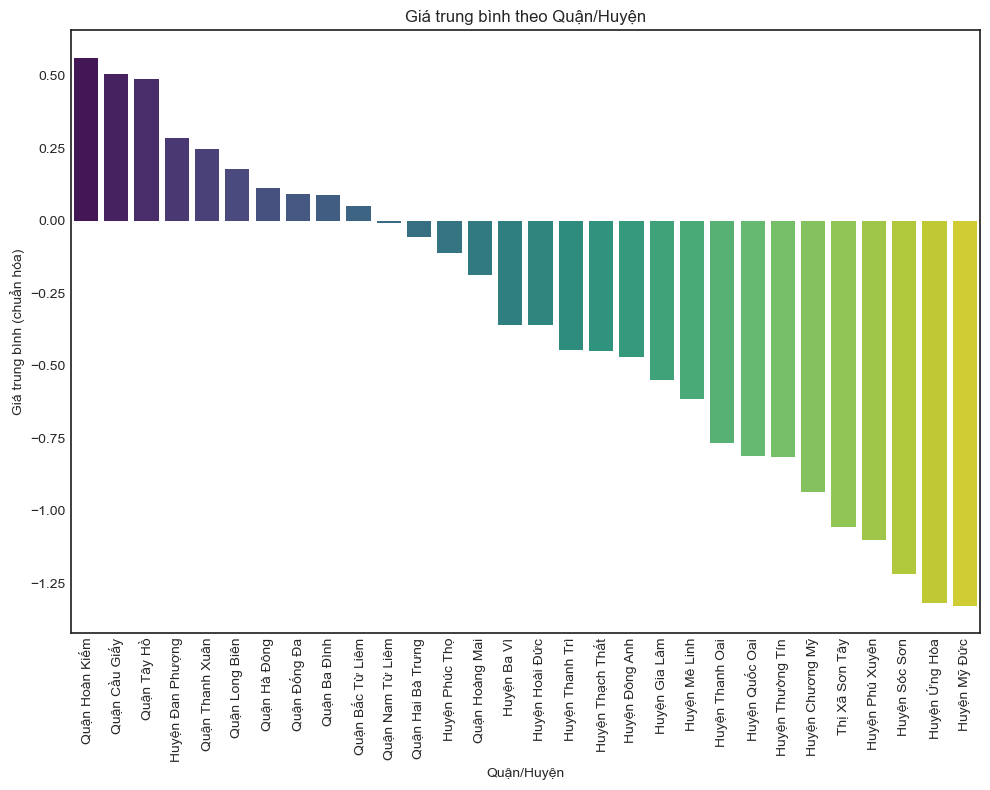

In [16]:
# Giá trung bình giữa các quận huyện
plt.figure(figsize=(10,8))
avg_price_district = df.groupby('quận/huyện')['giá tiền (tỷ)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_district.index, y=avg_price_district.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Giá trung bình theo Quận/Huyện')
plt.ylabel('Giá trung bình (chuẩn hóa)')
plt.xlabel('Quận/Huyện')
plt.tight_layout()
plt.savefig(f"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/DoThi/KhuVuc/gia_tb_quan_huyen.png",
            dpi=300, bbox_inches='tight')
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_27536\231837030.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_ward.index, y=avg_price_ward.values, palette='magma')


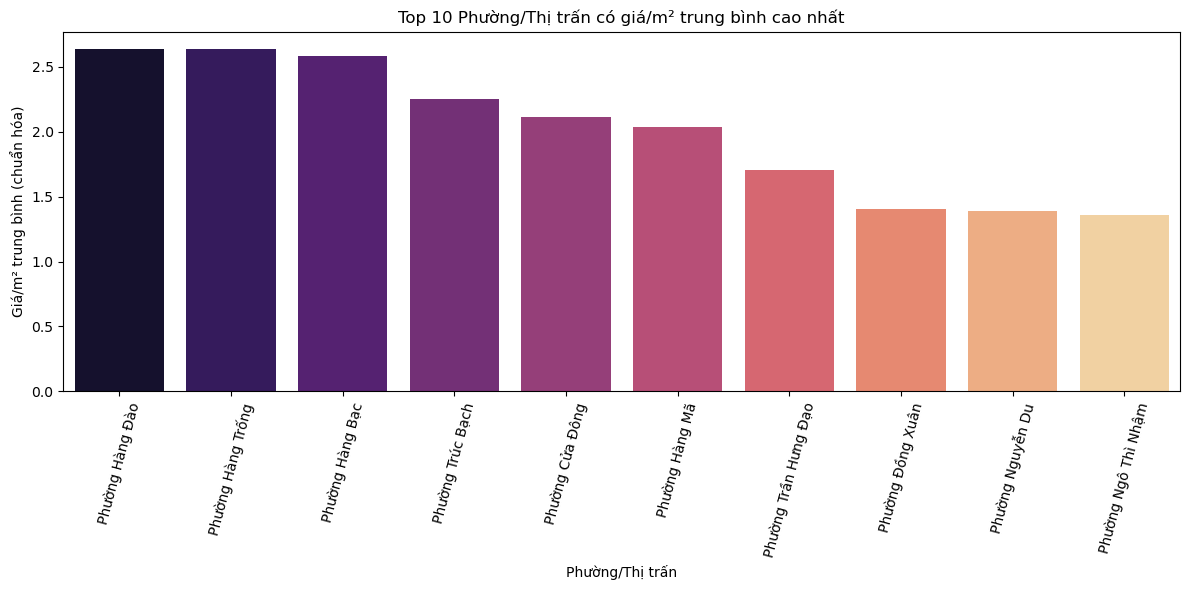

In [8]:
plt.figure(figsize=(12,6))
top_n = 10
avg_price_ward = df.groupby('phường/thị trấn')['giá/m2 (triệu/m2)'].mean().sort_values(ascending=False).head(top_n)
sns.barplot(x=avg_price_ward.index, y=avg_price_ward.values, palette='magma')
plt.xticks(rotation=75)
plt.title(f'Top {top_n} Phường/Thị trấn có giá/m² trung bình cao nhất')
plt.ylabel('Giá/m² trung bình (chuẩn hóa)')
plt.xlabel('Phường/Thị trấn')
plt.tight_layout()
plt.savefig(f"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/DoThi/KhuVuc/top_10_phuong.png",
            dpi=300, bbox_inches='tight')
plt.show()

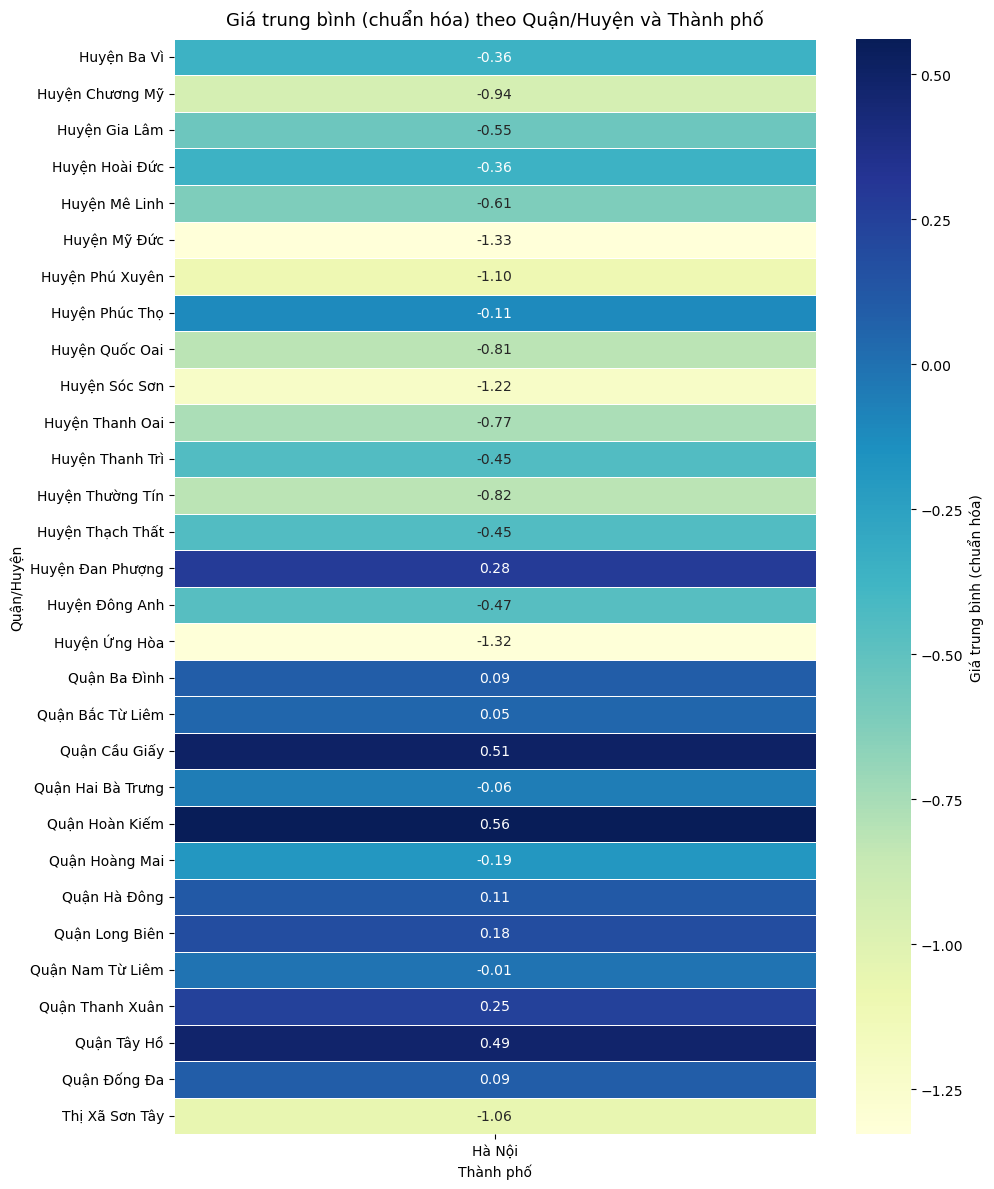

In [9]:
heat_data = df.pivot_table(
    values='giá tiền (tỷ)',
    index='quận/huyện',
    columns='thành phố',
    aggfunc='mean'
)

# Vẽ heatmap
plt.figure(figsize=(10, len(heat_data) * 0.4))  # tự động giãn chiều cao theo số quận
sns.heatmap(
    heat_data,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'Giá trung bình (chuẩn hóa)'}
)

plt.title('Giá trung bình (chuẩn hóa) theo Quận/Huyện và Thành phố', fontsize=13, pad=10)
plt.xlabel('Thành phố')
plt.ylabel('Quận/Huyện')
plt.tight_layout()
plt.savefig(f"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/DoThi/KhuVuc/gia_trung_binh.png",
            dpi=300, bbox_inches='tight')
plt.show()


C:\Users\LEGION\AppData\Local\Temp\ipykernel_27536\4276074560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


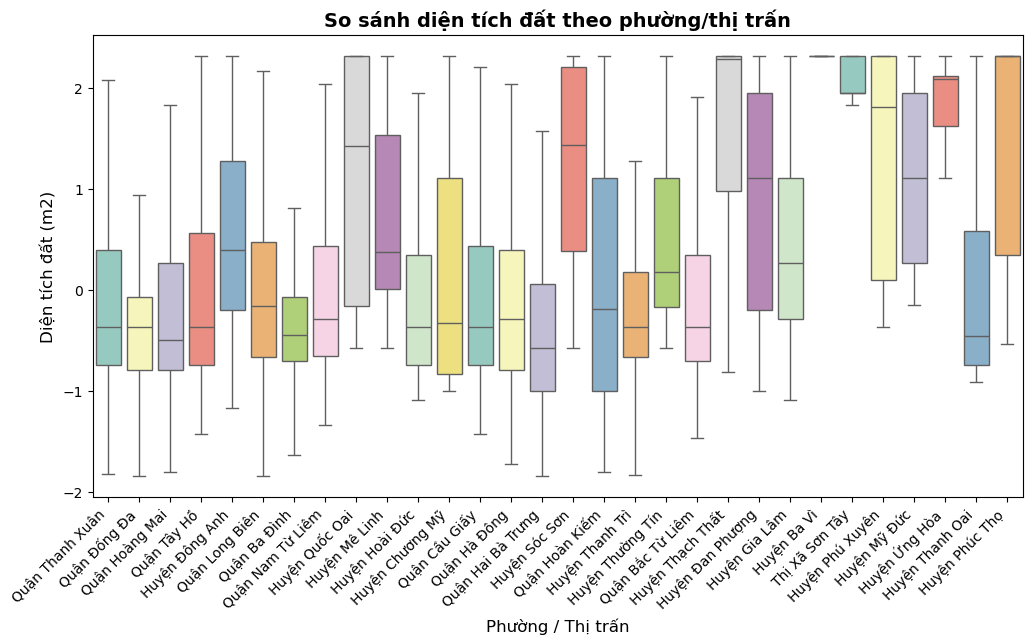

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(
    x="quận/huyện",
    y="diện tích đất (m2)",
    data=df,
    showfliers=False,      # Ẩn điểm ngoại lai cho dễ nhìn (tuỳ chọn)
    palette="Set3"
)

plt.title("So sánh diện tích đất theo phường/thị trấn", fontsize=14, fontweight="bold")
plt.xlabel("Phường / Thị trấn", fontsize=12)
plt.ylabel("Diện tích đất (m2)", fontsize=12)

# Xoay nhãn phường cho dễ đọc
plt.xticks(rotation=45, ha="right")

# Lưu hình
plt.savefig(
    "C:/Users/LEGION/Jupyter/KhoaHocDuLieu/DoThi/KhuVuc/so_sanh_dien_tich_theo_phuong.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


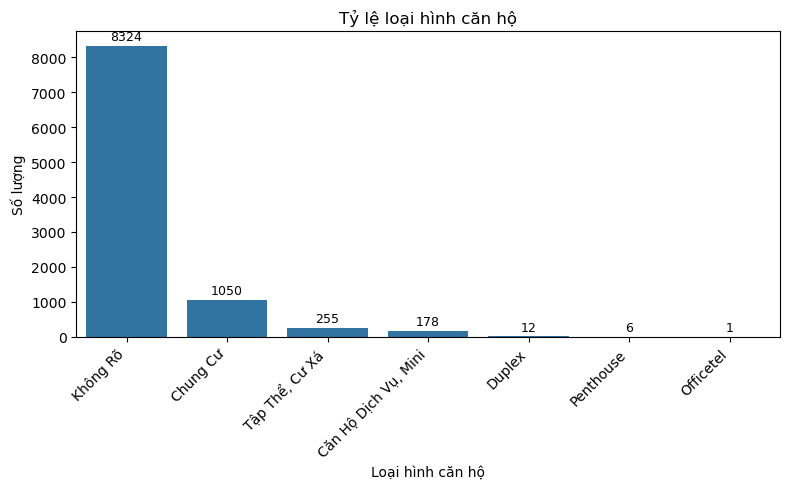

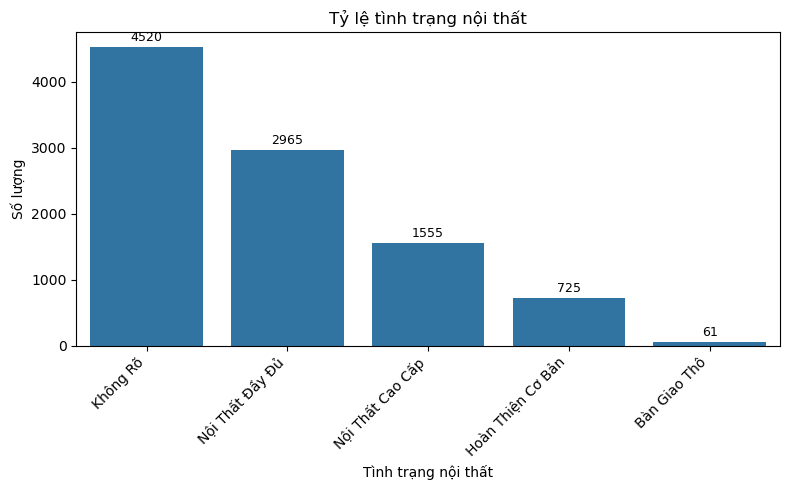

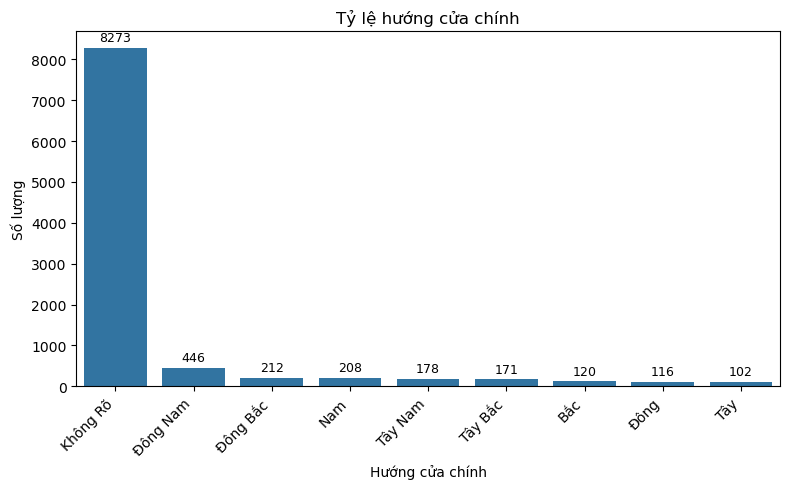

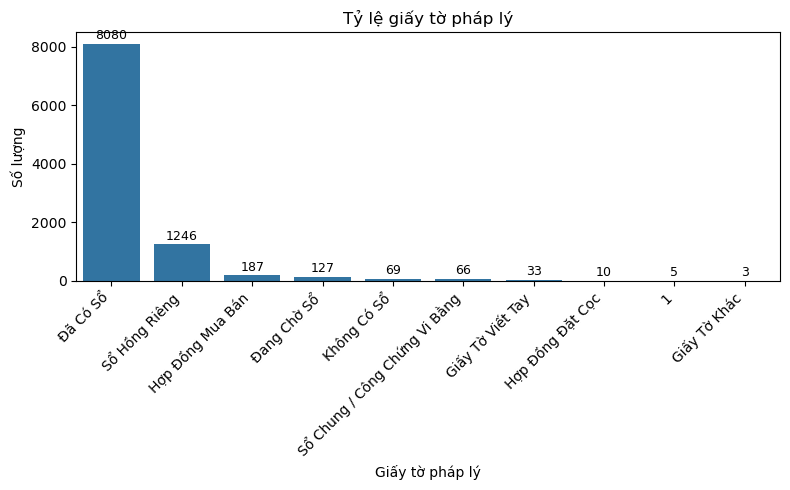

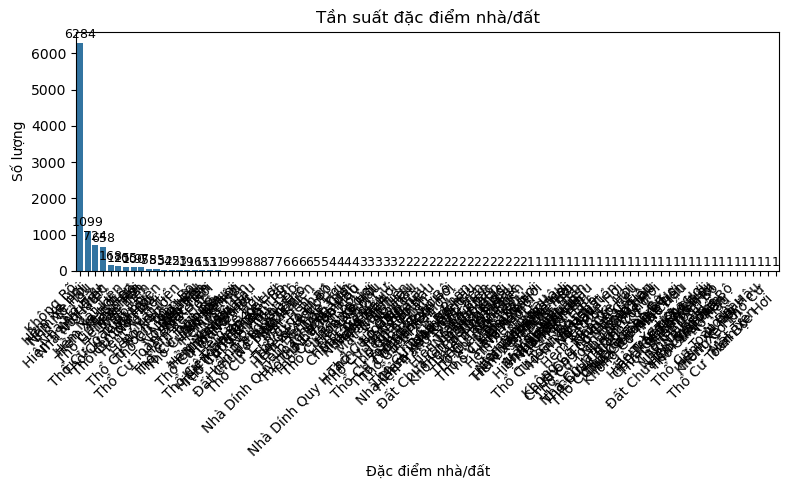

✅ Đã vẽ và lưu 5 biểu đồ tỷ lệ vào thư mục: C:\Users\LEGION\Jupyter\KhoaHocDuLieu\DoThi\TiLe


In [11]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo thư mục lưu hình nếu chưa có
save_dir = r"C:\Users\LEGION\Jupyter\KhoaHocDuLieu\DoThi\TiLe"
os.makedirs(save_dir, exist_ok=True)

# Danh sách cột và cấu hình
bar_configs = [
    {"col": "loại hình căn hộ", "title": "Tỷ lệ loại hình căn hộ", "xlabel": "Loại hình căn hộ", "filename": "ti_le_loai_hinh"},
    {"col": "tình trạng nội thất", "title": "Tỷ lệ tình trạng nội thất", "xlabel": "Tình trạng nội thất", "filename": "ti_le_noi_that"},
    {"col": "hướng cửa chính", "title": "Tỷ lệ hướng cửa chính", "xlabel": "Hướng cửa chính", "filename": "ti_le_huong_cua"},
    {"col": "giấy tờ pháp lý", "title": "Tỷ lệ giấy tờ pháp lý", "xlabel": "Giấy tờ pháp lý", "filename": "ti_le_phap_ly"},
    {"col": "đặc điểm nhà/đất", "title": "Tần suất đặc điểm nhà/đất", "xlabel": "Đặc điểm nhà/đất", "filename": "dac_diem_nha_dat"},
]

# --------------------------
# Vẽ Bar chart cho từng cột
# --------------------------
for cfg in bar_configs:
    col = cfg["col"]
    plt.figure(figsize=(8,5))

    # Vẽ biểu đồ
    data_count = df[col].value_counts().sort_values(ascending=False)
    sns.barplot(x=data_count.index, y=data_count.values)

    # Thêm tiêu đề và nhãn
    plt.title(cfg["title"])
    plt.xlabel(cfg["xlabel"])
    plt.ylabel("Số lượng")
    plt.xticks(rotation=45, ha='right')

    # Ghi giá trị trên đầu cột
    for i, v in enumerate(data_count.values):
        plt.text(i, v + 0.02 * max(data_count.values), str(v), ha='center', fontsize=9)

    # Lưu file ảnh
    filepath = os.path.join(save_dir, f"{cfg['filename']}.png")
    plt.tight_layout()
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

print("✅ Đã vẽ và lưu 5 biểu đồ tỷ lệ vào thư mục:", save_dir)


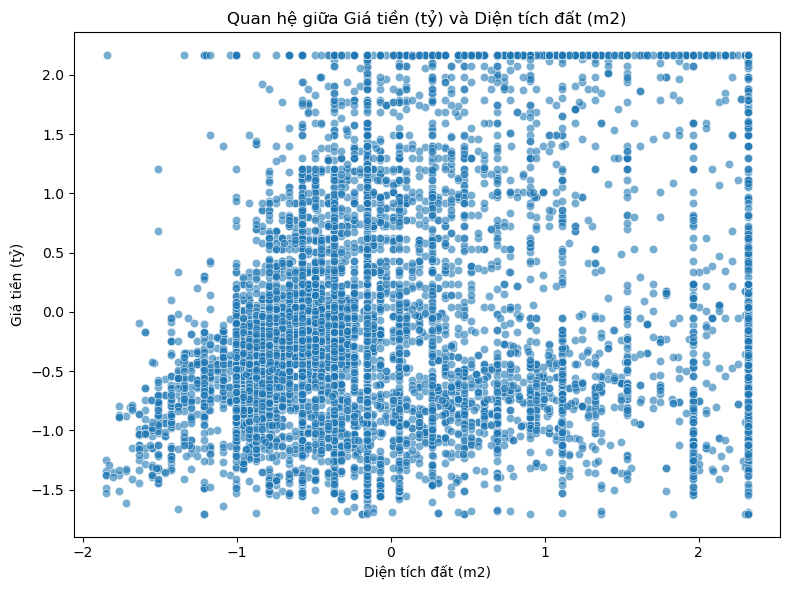

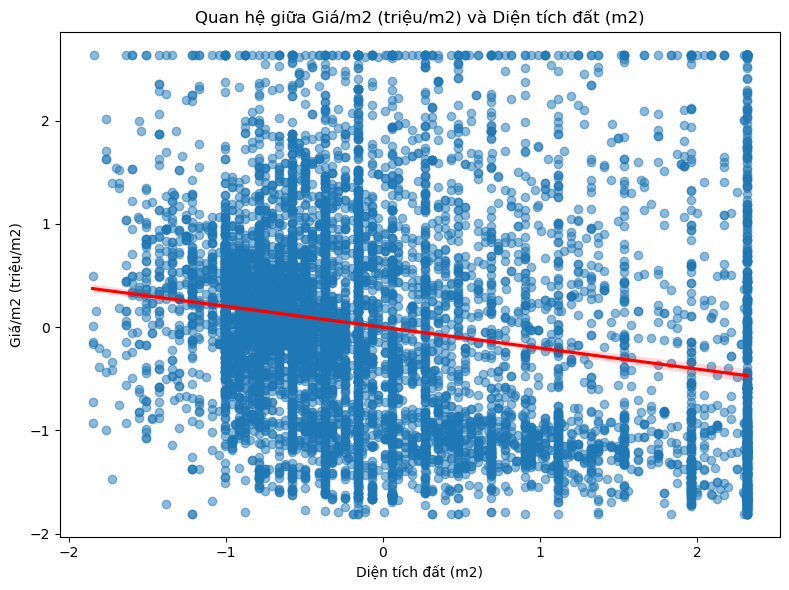

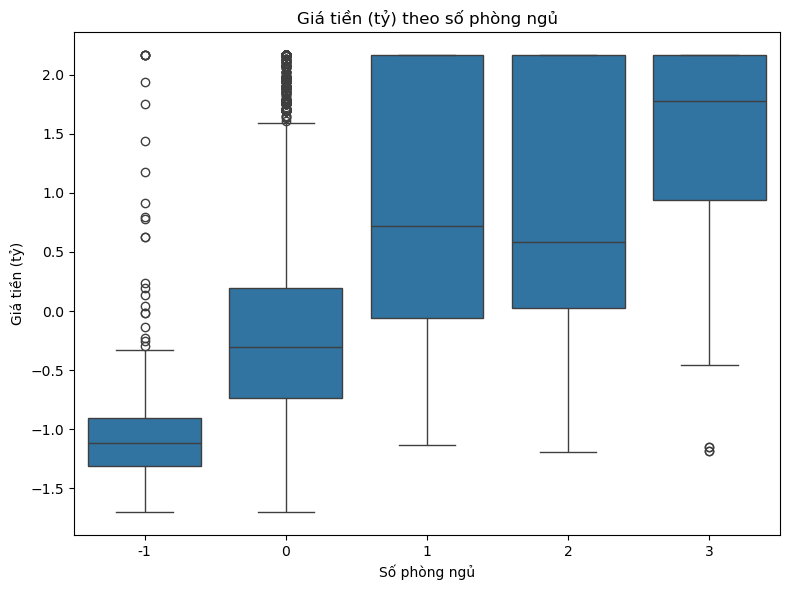

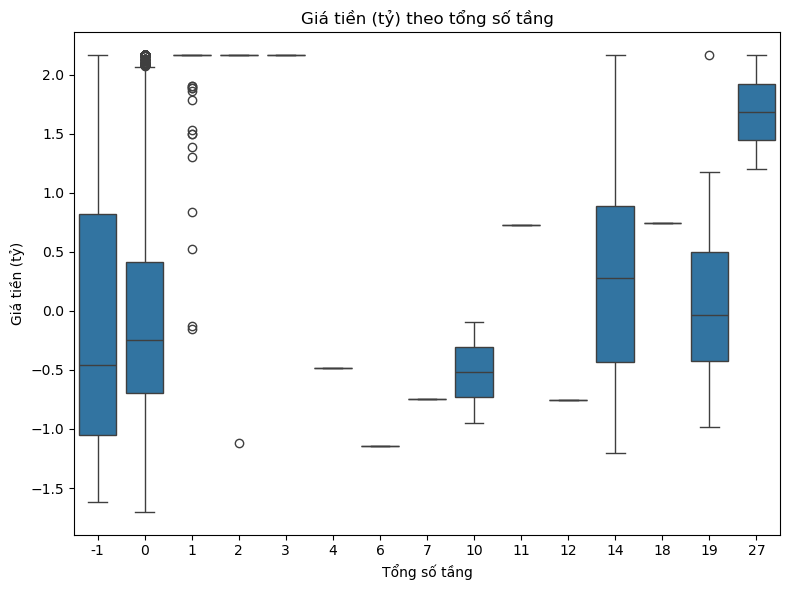

✅ Đã vẽ và lưu toàn bộ 4 biểu đồ quan hệ vào thư mục: C:\Users\LEGION\Jupyter\KhoaHocDuLieu\DoThi\QuanHe


In [12]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Tạo thư mục lưu ảnh
# --------------------------
save_dir = r"C:\Users\LEGION\Jupyter\KhoaHocDuLieu\DoThi\QuanHe"
os.makedirs(save_dir, exist_ok=True)

# --------------------------
# 1️⃣ Quan hệ giữa giá và diện tích — Scatter plot
# --------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x="diện tích đất (m2)", 
    y="giá tiền (tỷ)", 
    alpha=0.6
)
plt.title("Quan hệ giữa Giá tiền (tỷ) và Diện tích đất (m2)")
plt.xlabel("Diện tích đất (m2)")
plt.ylabel("Giá tiền (tỷ)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "gia_vs_dientich_scatter.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()


# --------------------------
# 2️⃣ Quan hệ giữa giá/m2 và diện tích — Scatter + Trendline
# --------------------------
plt.figure(figsize=(8,6))
sns.regplot(
    data=df, 
    x="diện tích đất (m2)", 
    y="giá/m2 (triệu/m2)", 
    scatter_kws={"alpha":0.5}, 
    line_kws={"color":"red"}
)
plt.title("Quan hệ giữa Giá/m2 (triệu/m2) và Diện tích đất (m2)")
plt.xlabel("Diện tích đất (m2)")
plt.ylabel("Giá/m2 (triệu/m2)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "gia_m2_vs_dientich_trend.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()


# --------------------------
# 3️⃣ Quan hệ giữa giá tiền và số phòng ngủ — Boxplot
# --------------------------
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df, 
    x="số phòng ngủ", 
    y="giá tiền (tỷ)"
)
plt.title("Giá tiền (tỷ) theo số phòng ngủ")
plt.xlabel("Số phòng ngủ")
plt.ylabel("Giá tiền (tỷ)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "gia_vs_phongngu_box.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()


# --------------------------
# 4️⃣ Quan hệ giữa tổng số tầng và giá tiền — Boxplot
# --------------------------
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df, 
    x="tổng số tầng", 
    y="giá tiền (tỷ)"
)
plt.title("Giá tiền (tỷ) theo tổng số tầng")
plt.xlabel("Tổng số tầng")
plt.ylabel("Giá tiền (tỷ)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "gia_vs_tongtang_box.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("✅ Đã vẽ và lưu toàn bộ 4 biểu đồ quan hệ vào thư mục:", save_dir)


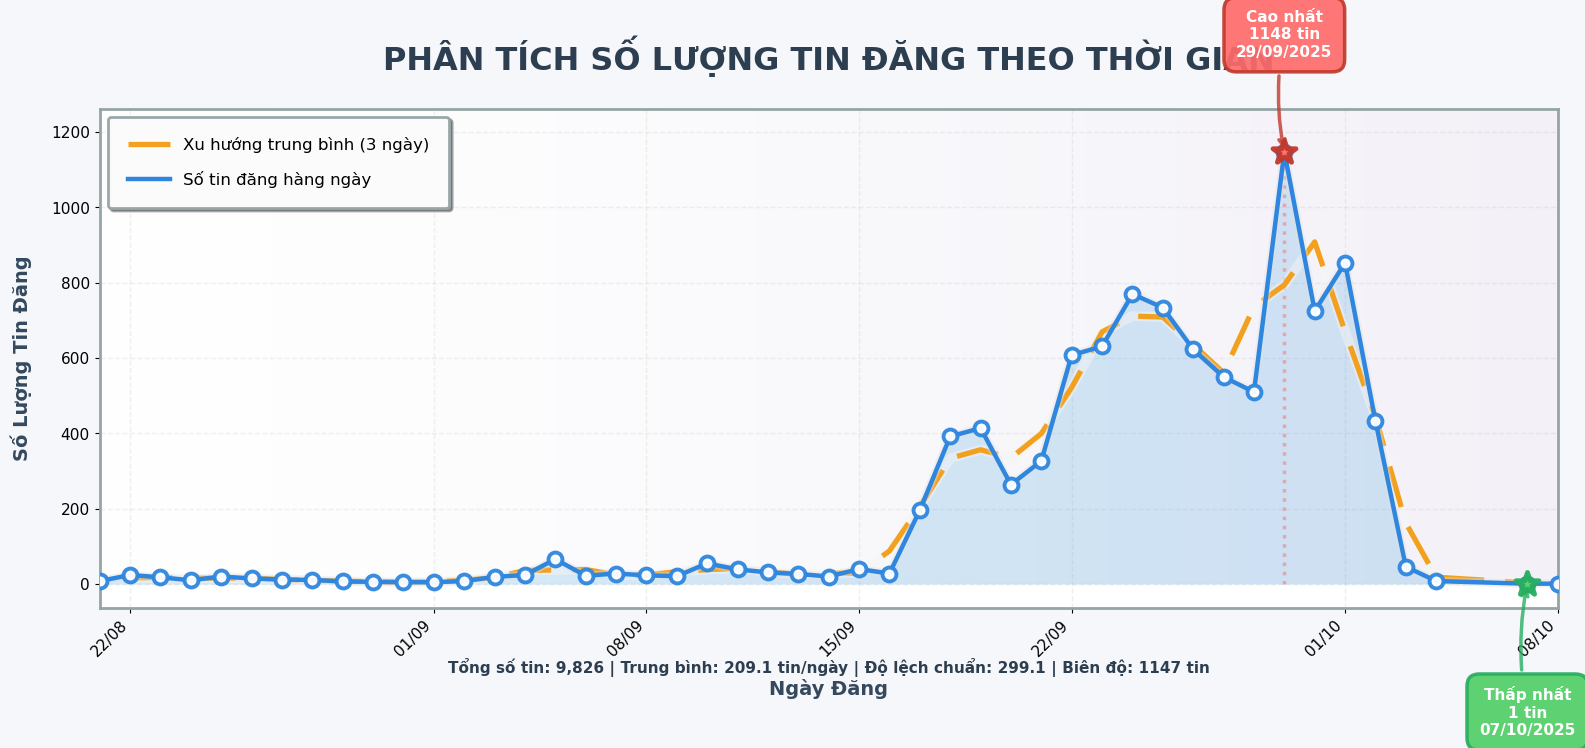

In [13]:
# SỐ lượng tin đăng theo tháng
df["ngày đăng"] = pd.to_datetime(df["ngày đăng"], errors="coerce")

# --- Tính số lượng tin đăng theo ngày ---
count_by_day = df.groupby("ngày đăng").size().sort_index()

# --- Tính trung bình trượt (xu hướng mềm) ---
rolling_mean = count_by_day.rolling(window=3, center=True).mean()

# --- Khởi tạo biểu đồ với style cao cấp ---
fig, ax = plt.subplots(figsize=(16, 8), facecolor='#F5F7FA')
ax.set_facecolor('#FFFFFF')

# --- Tạo gradient background ---
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap='Purples', alpha=0.06, 
          extent=[mdates.date2num(count_by_day.index[0]), 
                  mdates.date2num(count_by_day.index[-1]), 
                  count_by_day.min() * 0.9, count_by_day.max() * 1.1])

# --- Vẽ vùng tô màu dưới đường chính ---
ax.fill_between(count_by_day.index, count_by_day.values, 
                alpha=0.2, color='#3498DB', linewidth=0, zorder=2)

# --- Vẽ đường trung bình trượt với hiệu ứng ---
ax.plot(count_by_day.index, rolling_mean,
        color='#F5F5F5', linewidth=7, zorder=3, alpha=0.5)  # Shadow
ax.plot(count_by_day.index, rolling_mean,
        color='#F39C12', linewidth=3.8, linestyle='--', 
        dashes=(8, 4), zorder=4, label='Xu hướng trung bình (3 ngày)',
        alpha=0.95)

# --- Vẽ đường chính với shadow effect ---
ax.plot(count_by_day.index, count_by_day.values,
        color='#E0E0E0', linewidth=6, zorder=5, alpha=0.4)  # Shadow
ax.plot(count_by_day.index, count_by_day.values,
        color='#2E86DE', linewidth=3.2, zorder=6, 
        label='Số tin đăng hàng ngày')

# --- Vẽ các điểm dữ liệu ---
ax.scatter(count_by_day.index, count_by_day.values,
           s=100, color='#FFFFFF', edgecolors='#2E86DE',
           linewidths=2.8, zorder=7, alpha=0.95)

# --- Xác định điểm cao nhất & thấp nhất ---
max_day = count_by_day.idxmax()
min_day = count_by_day.idxmin()
max_val = count_by_day.max()
min_val = count_by_day.min()

# --- Đánh dấu điểm cao nhất ---
ax.scatter(max_day, max_val, color='#FF6B6B', s=300, 
          edgecolors='#C0392B', linewidths=3.5, zorder=8,
          marker='*', alpha=0.95)

# --- Đánh dấu điểm thấp nhất ---
ax.scatter(min_day, min_val, color='#51CF66', s=300, 
          edgecolors='#27AE60', linewidths=3.5, zorder=8,
          marker='*', alpha=0.95)

# --- Vẽ đường kẻ dọc từ điểm cao/thấp ---
ax.vlines(max_day, count_by_day.min() * 0.9, max_val, 
         colors='#FF6B6B', linestyles=':', alpha=0.5, linewidth=2.5)
ax.vlines(min_day, count_by_day.min() * 0.9, min_val, 
         colors='#51CF66', linestyles=':', alpha=0.5, linewidth=2.5)

# --- Annotation chi tiết với box đẹp ---
bbox_max = dict(boxstyle='round,pad=0.8', facecolor='#FF6B6B', 
               edgecolor='#C0392B', linewidth=2.5, alpha=0.92)
ax.annotate(
    f'Cao nhất\n{max_val} tin\n{max_day.strftime("%d/%m/%Y")}',
    xy=(max_day, max_val),
    xytext=(max_day, max_val + max_val*0.22),
    ha='center',
    fontsize=11,
    weight='bold',
    color='white',
    bbox=bbox_max,
    arrowprops=dict(
        arrowstyle='->', 
        connectionstyle='arc3,rad=0.1',
        color='#C0392B', 
        lw=2.5,
        alpha=0.8
    ),
    zorder=9
)

bbox_min = dict(boxstyle='round,pad=0.8', facecolor='#51CF66', 
               edgecolor='#27AE60', linewidth=2.5, alpha=0.92)
ax.annotate(
    f'Thấp nhất\n{min_val} tin\n{min_day.strftime("%d/%m/%Y")}',
    xy=(min_day, min_val),
    xytext=(min_day, min_val - max_val * 0.35),
    ha='center',
    fontsize=11,
    weight='bold',
    color='white',
    bbox=bbox_min,
    arrowprops=dict(
        arrowstyle='->', 
        connectionstyle='arc3,rad=-0.1',
        color='#27AE60', 
        lw=2.5,
        alpha=0.8
    ),
    zorder=9
)

# --- Tiêu đề và nhãn trục ---
ax.set_title('PHÂN TÍCH SỐ LƯỢNG TIN ĐĂNG THEO THỜI GIAN', 
            fontsize=23, weight='bold', color='#2C3E50', 
            pad=28, family='sans-serif')

ax.set_xlabel('Ngày Đăng', fontsize=14, labelpad=14, 
             color='#34495E', weight='semibold')
ax.set_ylabel('Số Lượng Tin Đăng', fontsize=14, 
             labelpad=14, color='#34495E', weight='semibold')

# --- Căn chỉnh trục thời gian ---
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', 
        fontsize=11, weight='medium')

# --- Cải thiện trục y ---
plt.setp(ax.yaxis.get_majorticklabels(), fontsize=11, weight='medium')

# --- Grid đẹp ---
ax.grid(True, alpha=0.25, linestyle='--', linewidth=1, 
       color='#BDC3C7', zorder=1, which='both')
ax.set_axisbelow(True)

# --- Chú thích với style cao cấp ---
legend = ax.legend(fontsize=12, loc='upper left', 
                  framealpha=0.96, edgecolor='#95A5A6',
                  facecolor='#FFFFFF', shadow=True,
                  borderpad=1.2, labelspacing=1.1,
                  handlelength=2.5)
legend.get_frame().set_linewidth(2)

# --- Làm đẹp khung viền ---
for spine in ax.spines.values():
    spine.set_edgecolor('#95A5A6')
    spine.set_linewidth(2)

# --- Thêm box thống kê tổng quan ---
total_posts = count_by_day.sum()
avg_posts = count_by_day.mean()
std_posts = count_by_day.std()

stats_text = (
    f'Tổng số tin: {total_posts:,} | '
    f'Trung bình: {avg_posts:.1f} tin/ngày | '
    f'Độ lệch chuẩn: {std_posts:.1f} | '
    f'Biên độ: {max_val - min_val} tin'
)

# Tạo box thống kê đẹp
stats_box = FancyBboxPatch((0.02, -0.14), 0.96, 0.06,
                          boxstyle="round,pad=0.01",
                          transform=ax.transAxes,
                          facecolor='#ECF0F1', 
                          edgecolor='#95A5A6',
                          linewidth=1.5,
                          zorder=10)
ax.add_patch(stats_box)

ax.text(0.5, -0.13, stats_text, transform=ax.transAxes,
        ha='center', fontsize=11, color='#2C3E50', 
        weight='semibold', zorder=11)

# --- Điều chỉnh layout ---
plt.tight_layout()

# --- Lưu và hiển thị ---
plt.savefig(r'C:\Users\LEGION\Jupyter\KhoaHocDuLieu\DoThi\ThoiGian\Biểu đồ lượng thông tin.png', 
           dpi=350, bbox_inches='tight', facecolor='#F5F7FA')
plt.show()
plt.close()

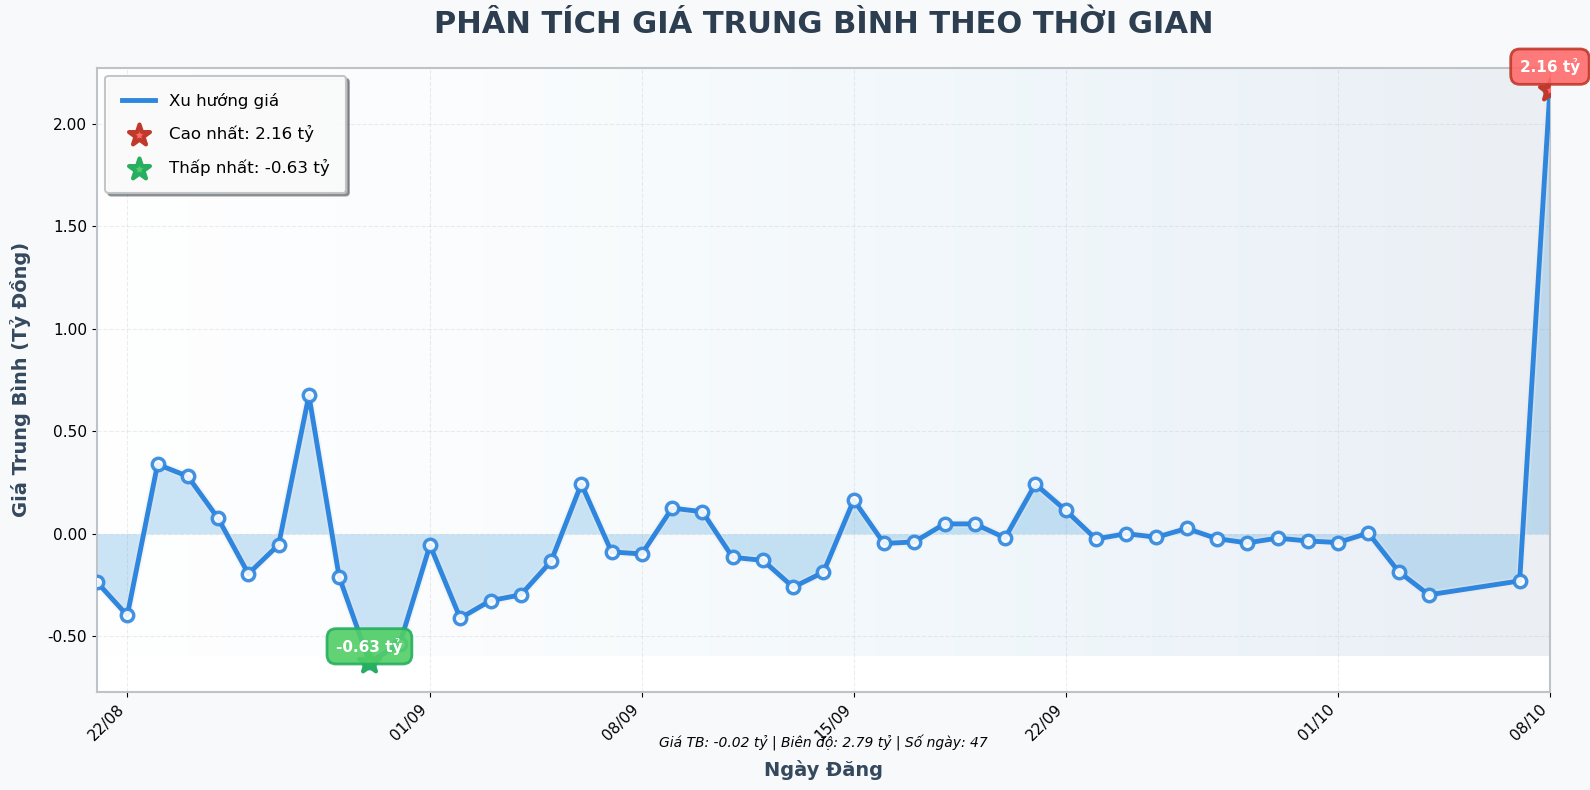

In [14]:
# Giá trung bình theo thời gian

# --- Tính giá trung bình theo ngày ---
avg_price = df.groupby("ngày đăng")["giá tiền (tỷ)"].mean().dropna()

# --- Khởi tạo biểu đồ với style hiện đại ---
fig, ax = plt.subplots(figsize=(16, 8), facecolor='#F8F9FA')
ax.set_facecolor('#FFFFFF')

# --- Tạo gradient background ---
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap='Blues', alpha=0.08, 
          extent=[mdates.date2num(avg_price.index[0]), 
                  mdates.date2num(avg_price.index[-1]), 
                  avg_price.min() * 0.95, avg_price.max() * 1.05])

# --- Vẽ vùng tô màu dưới đường xu hướng ---
ax.fill_between(avg_price.index, avg_price.values, 
                alpha=0.25, color='#3498DB', 
                linewidth=0, zorder=2)

# --- Vẽ đường xu hướng chính với shadow effect ---
ax.plot(avg_price.index, avg_price.values,
        color='#E8E8E8', linewidth=6, zorder=3, alpha=0.4)  # Shadow
ax.plot(avg_price.index, avg_price.values,
        color='#2E86DE', linewidth=3.5, zorder=4, 
        label='Xu hướng giá')

# --- Vẽ các điểm dữ liệu với style hiện đại ---
ax.scatter(avg_price.index, avg_price.values,
           s=80, color='#FFFFFF', edgecolors='#2E86DE',
           linewidths=2.5, zorder=5, alpha=0.9)

# --- Điểm cao nhất và thấp nhất ---
max_day = avg_price.idxmax()
min_day = avg_price.idxmin()
max_val = avg_price.max()
min_val = avg_price.min()

# Vẽ điểm cao nhất
ax.scatter(max_day, max_val, s=250, color='#FF6B6B', 
          edgecolors='#C0392B', linewidths=3, zorder=6,
          marker='*', label=f'Cao nhất: {max_val:.2f} tỷ')

# Vẽ điểm thấp nhất
ax.scatter(min_day, min_val, s=250, color='#51CF66', 
          edgecolors='#27AE60', linewidths=3, zorder=6,
          marker='*', label=f'Thấp nhất: {min_val:.2f} tỷ')

# --- Vẽ đường kẻ dọc từ điểm cao/thấp xuống trục x ---
ax.vlines(max_day, avg_price.min() * 0.95, max_val, 
         colors='#FF6B6B', linestyles='--', alpha=0.4, linewidth=2)
ax.vlines(min_day, avg_price.min() * 0.95, min_val, 
         colors='#51CF66', linestyles='--', alpha=0.4, linewidth=2)

# --- Ghi chú giá trị với box đẹp ---
bbox_props_max = dict(boxstyle='round,pad=0.6', facecolor='#FF6B6B', 
                     edgecolor='#C0392B', linewidth=2, alpha=0.9)
ax.text(max_day, max_val + (max_val * 0.04), f'{max_val:.2f} tỷ',
        color='white', fontsize=11, ha='center', fontweight='bold',
        bbox=bbox_props_max, zorder=7)

bbox_props_min = dict(boxstyle='round,pad=0.6', facecolor='#51CF66', 
                     edgecolor='#27AE60', linewidth=2, alpha=0.9)
ax.text(min_day, min_val - (min_val * 0.08), f'{min_val:.2f} tỷ',
        color='white', fontsize=11, ha='center', fontweight='bold',
        bbox=bbox_props_min, zorder=7)

# --- Tiêu đề và nhãn trục với style đẹp ---
ax.set_title('PHÂN TÍCH GIÁ TRUNG BÌNH THEO THỜI GIAN', 
            fontsize=22, weight='bold', color='#2C3E50', 
            pad=25, family='sans-serif')

ax.set_xlabel('Ngày Đăng', fontsize=14, labelpad=12, 
             color='#34495E', weight='semibold')
ax.set_ylabel('Giá Trung Bình (Tỷ Đồng)', fontsize=14, 
             labelpad=12, color='#34495E', weight='semibold')

# --- Căn chỉnh trục thời gian ---
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=11)

# --- Cải thiện trục y ---
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'))
plt.setp(ax.yaxis.get_majorticklabels(), fontsize=11)

# --- Grid đẹp và tinh tế ---
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, color='#BDC3C7', zorder=1)
ax.set_axisbelow(True)

# --- Thêm chú thích với style đẹp ---
legend = ax.legend(fontsize=12, loc='upper left', 
                  framealpha=0.95, edgecolor='#BDC3C7',
                  facecolor='#FFFFFF', shadow=True,
                  borderpad=1, labelspacing=1)
legend.get_frame().set_linewidth(1.5)

# --- Làm đẹp khung viền ---
for spine in ax.spines.values():
    spine.set_edgecolor('#BDC3C7')
    spine.set_linewidth(1.5)

# --- Thêm thông tin thống kê ---
stats_text = (f'Giá TB: {avg_price.mean():.2f} tỷ | '
             f'Biên độ: {(max_val - min_val):.2f} tỷ | '
             f'Số ngày: {len(avg_price)}')
ax.text(0.5, -0.09, stats_text, transform=ax.transAxes,
        ha='center', fontsize=10, color="#040404", style='italic')

# --- Điều chỉnh layout ---
plt.tight_layout()

# --- Lưu và hiển thị ---
plt.savefig(r'C:\Users\LEGION\Jupyter\KhoaHocDuLieu\DoThi\ThoiGian\Biểu đồ giá trung bình theo thời gian.png', 
           dpi=300, bbox_inches='tight', facecolor='#F8F9FA')
plt.show()
plt.close()

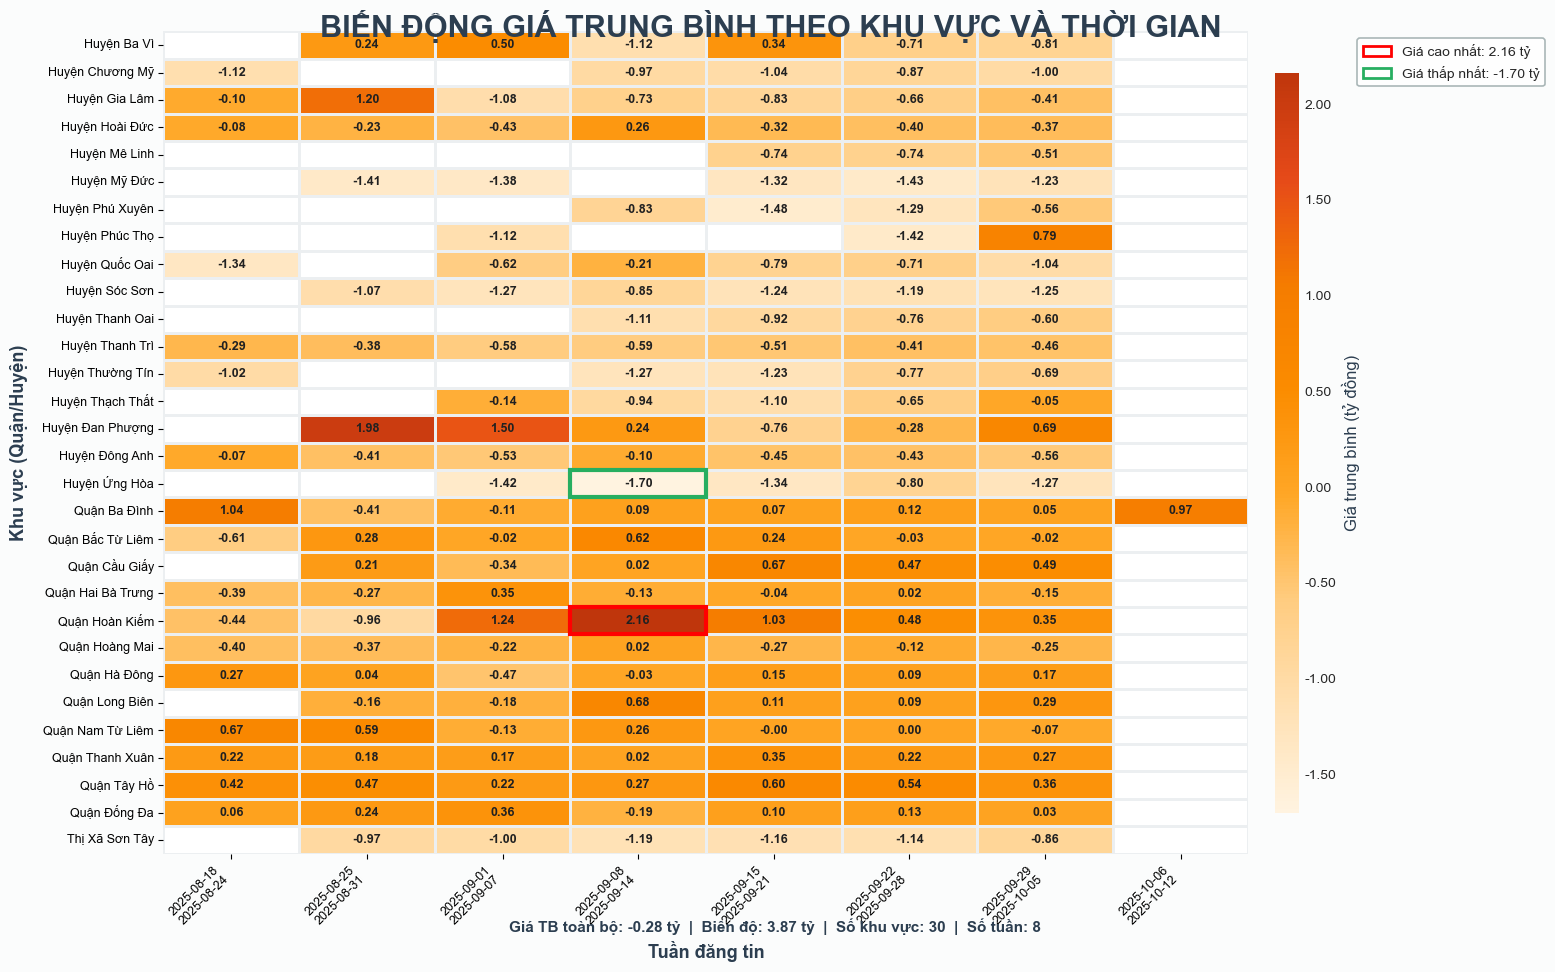

In [15]:
#Xu hướng giá theo khu vực
# --- Chuẩn bị dữ liệu ---
heat = (
    df.groupby([df["ngày đăng"].dt.to_period("W"), "quận/huyện"])["giá tiền (tỷ)"]
    .mean()
    .unstack()
)

# --- Khởi tạo Figure với constrained_layout ---
fig, ax = plt.subplots(figsize=(16, 10), facecolor="#FBFCFC", constrained_layout=False)
plt.style.use("seaborn-v0_8-white")

# --- Tạo colormap ---
colors = ['#FFF3E0', '#FFE0B2', '#FFCC80', '#FFA726',
          '#FB8C00', '#F57C00', '#E64A19', '#BF360C']
cmap = LinearSegmentedColormap.from_list('warm_gradient', colors, N=200)

# --- Heatmap chính ---
sns.heatmap(
    heat.T,
    cmap=cmap,
    linewidths=1,
    linecolor="#ECEFF1",
    cbar_kws={
        'label': 'Giá trung bình (tỷ đồng)',
        'shrink': 0.9,
        'aspect': 30,
        'pad': 0.02,
        'format': '%.2f'
    },
    annot=True,
    fmt='.2f',
    annot_kws={'size': 9, 'weight': 'semibold', 'color': '#212121'},
    ax=ax,
    vmin=np.nanmin(heat.values),
    vmax=np.nanmax(heat.values)
)

# --- Cực trị ---
max_val = np.nanmax(heat.values)
min_val = np.nanmin(heat.values)
max_pos = np.argwhere(heat.values == max_val)
min_pos = np.argwhere(heat.values == min_val)
for (i, j) in max_pos:
    ax.add_patch(Rectangle((i, j), 1, 1, fill=False,
                           edgecolor="#FF0000FF", linewidth=3, zorder=10))
    
for (i, j) in min_pos:
    ax.add_patch(Rectangle((i, j), 1, 1, fill=False,
                           edgecolor='#27AE60', linewidth=3, zorder=10))

# --- Colorbar style ---
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Giá trung bình (tỷ đồng)", fontsize=12, color="#2C3E50")

# --- Nhãn trục ---
ax.set_xlabel('Tuần đăng tin', fontsize=13, color='#2C3E50', weight='semibold', labelpad=10)
ax.set_ylabel('Khu vực (Quận/Huyện)', fontsize=13, color='#2C3E50', weight='semibold', labelpad=10)
x_labels = [str(p).replace('/', '\n') for p in heat.index]
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(heat.columns, rotation=0, fontsize=9)

# --- Viền heatmap ---
for spine in ax.spines.values():
    spine.set_edgecolor('#B0BEC5')
    spine.set_linewidth(1.5)

# --- Legend (đặt ra ngoài để tránh che heatmap) ---
legend_elems = [
    Patch(facecolor='none', edgecolor="#FF0000", linewidth=2,
          label=f'Giá cao nhất: {max_val:.2f} tỷ'),
    Patch(facecolor='none', edgecolor='#27AE60', linewidth=2,
          label=f'Giá thấp nhất: {min_val:.2f} tỷ')
]
leg = ax.legend(handles=legend_elems, loc='upper right', bbox_to_anchor=(1.28, 1),
                fontsize=10, frameon=True, edgecolor='#95A5A6')
leg.get_frame().set_linewidth(1.2)

# --- Tiêu đề (dùng fig.transFigure để tránh đè nhau) ---
fig.text(0.5, 0.96,
         "BIẾN ĐỘNG GIÁ TRUNG BÌNH THEO KHU VỰC VÀ THỜI GIAN ",
         size=22, weight='bold', ha='center', color='#2C3E50')

# --- Thống kê tổng quan (đặt bằng fig.transFigure, tách hẳn heatmap) ---
fig.text(0.5, 0.065,
         (f"Giá TB toàn bộ: {np.nanmean(heat.values):.2f} tỷ  |  "
          f"Biên độ: {max_val - min_val:.2f} tỷ  |  "
          f"Số khu vực: {len(heat.columns)}  |  "
          f"Số tuần: {len(heat.index)}"),
         ha='center', fontsize=11, color='#2C3E50', weight='semibold')

# --- Căn lề khoảng trắng ---
fig.subplots_adjust(top=0.88, bottom=0.15, left=0.15, right=0.92)
plt.tight_layout(pad=2.5)

# --- Lưu và hiển thị ---
plt.savefig(r"C:\Users\LEGION\Jupyter\KhoaHocDuLieu\DoThi\ThoiGian\Biểu đồ heatmap giá trung bình theo khu vực và thời gian.png",
            dpi=400, bbox_inches='tight', facecolor="#FBFCFC")
plt.show()
plt.close()